In [50]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
from scipy.optimize import minimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [51]:
date = '20220328'
dataNo = 1
scanNo = 2

In [52]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [89]:
param_name = 'T0005: Sweep param 5 (usec.)'
scan_param =scan_data[param_name]
unique_param = scan_param.unique()
sample1 = unique_param[19]
sample2 = unique_param[10]
sample3 = unique_param[0]
unit = '[us]'

In [90]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

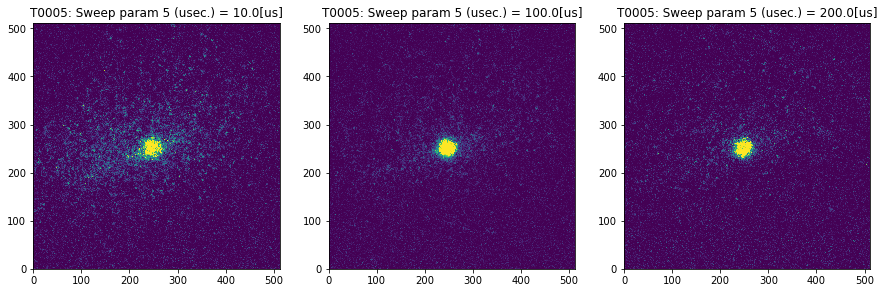

In [91]:
vmin = 0
vmax = 1500
xlim_1 = 120
xlim_2 = 320
ylim_1 = 140
ylim_2 = 340

fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
# ax1.set_xlim(120,320)
# ax1.set_ylim(140,340)
ax1.set_title(param_name+ " = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(2,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto')
ax2.set_aspect('equal')
# ax2.set_xlim(120,320)
# ax2.set_ylim(140,340)
ax2.set_title(param_name+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(2,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto')
ax3.set_aspect('equal')
# ax3.set_xlim(120,320)
# ax3.set_ylim(140,340)
ax3.set_title(param_name+ " = %.01f"%(sample3)+unit)


plt.show()

In [56]:
cx = 245
cy = 250
wx = 15
wy = 15
x0 = cx-wx; x1 = cx+wx
y0 = cy-wy; y1 = cy+wy

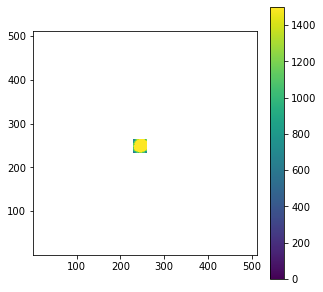

In [57]:
x=np.arange(x0,x1)
y=np.arange(y0,y1)
xmesh, ymesh = np.meshgrid(x,y)

fig =plt.figure(figsize=[5,5])
ax = fig.add_subplot(1,1,1)
mappable =ax.pcolormesh(xmesh,ymesh,img_trans_ave[y0:y1,x0:x1], vmin=vmin, vmax=vmax, shading='auto')
ax.set_aspect('equal')
ax.set_xlim(1,511)
ax.set_ylim(1,511)
fig.colorbar(mappable)

In [58]:
# img_trans_list =[]
# for N in range(len(trans_files)):
#     img_trans_temp = [np.array(Image.open(trans_files[N])) -img_flat_ave  ]
#     img_trans_list +=[np.sum(img_trans_temp[0][y0:y1,x0:x1])/np.sum(img_trans_temp)]


# unique_param = scan_param.unique()
# od_list = []
# od_err_list = []
# for i in range(len(unique_param)):
#     od_temp = []
#     od_err_temp = []
#     for j in range(len(trans_files)):
#         if scan_param[j] == unique_param[i]:
#             od_temp.append(img_trans_list[j])
#     od_list.append(np.mean(od_temp))
#     od_err_list.append(np.std(od_temp))

# fig = plt.figure(figsize=[6,4])
# ax = fig.add_subplot(1,1,1)
# ax.errorbar(unique_param*1e-3,od_list,od_err_list,fmt='o',label="Data")
# ax.set_xlabel('Lattice ramp up time [us]')
# ax.set_ylabel('ROI count / Full count')
# ax.legend()


a1= 0.005860281336822582
b1= 246.83990149799038
c1= 46.00173373632283
d= 0.0012932181386329188
$\delta$c1= 1.4110627728818514


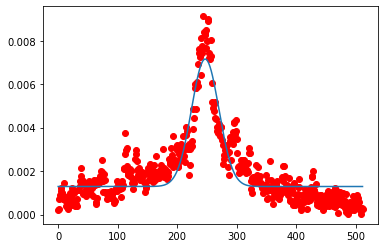

In [81]:
N=20
x_list =np.arange(np.shape(img_trans_list[0])[0])
nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
CoMy = []
CoMx = []

for i in range(len(nx)):
    CoMx += [i*nx[i]]
for i in range(len(ny)):
    CoMy += [i*ny[i]]
CoMx = np.sum(CoMx)
CoMy = np.sum(CoMy)
para_ini=[np.max(nx), CoMx,100, np.mean(nx[0:5])]
def nonlinear_fit(x,a1,b1,c1,d):
    return a1*np.exp(-2*(x-b1)**2/c1**2)+d
param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
list_x1=x_list
list_y1=[]
for num in list_x1:
    list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3])

perr=np.sqrt(np.diag(cov))
print("a1=",str(param[0]))
print("b1=",str(param[1]))
print("c1=",str(param[2]))
print("d=",str(param[3]))
print(r"$\delta$c1=",str(perr[2]))
plt.scatter(x_list,nx, label='Data',c="r")
plt.plot(x_list,list_y1)

a1= 0.005470838735252782
b1= 246.07582567577185
c1= 23.259737911764585
a2= 0.0023020168899739644
c2= 160.8876743108863
d= 0.0007364451747037682
$\delta$c1= 0.8385588586991631


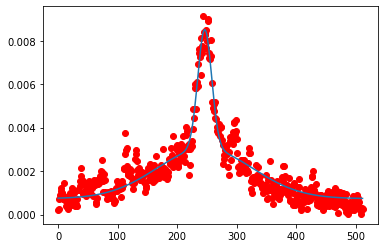

In [75]:
N=20
x_list =np.arange(np.shape(img_trans_list[0])[0])
nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
CoMy = []
CoMx = []

for i in range(len(nx)):
    CoMx += [i*nx[i]]
for i in range(len(ny)):
    CoMy += [i*ny[i]]
CoMx = np.sum(CoMx)
CoMy = np.sum(CoMy)
para_ini=[np.max(nx), CoMx,30, np.max(nx)/2,300, np.mean(nx[0:5])]
def nonlinear_fit(x,a1,b1,c1,a2,c2,d):
    return a1*np.exp(-2*(x-b1)**2/c1**2)+a2*np.exp(-2*(x-b1)**2/c2**2)+d
param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
list_x1=x_list
list_y1=[]
for num in list_x1:
    list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3]*np.exp(-2*(num-param[1])**2/param[4]**2)+param[5])

perr=np.sqrt(np.diag(cov))
print("a1=",str(param[0]))
print("b1=",str(param[1]))
print("c1=",str(param[2]))
print("a2=",str(param[3]))
print("c2=",str(param[4]))
print("d=",str(param[5]))
print(r"$\delta$c1=",str(perr[2]))
plt.scatter(x_list,nx, label='Data',c="r")
plt.plot(x_list,list_y1)

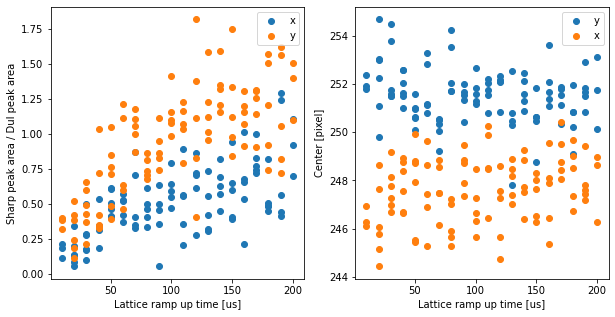

In [84]:
wx_list =[]
wy_list =[]
cx_list =[]
cy_list =[]
bec_frac_x_list = []
bec_frac_y_list = []
x_list =np.arange(np.shape(img_trans_list[0])[0])
y_list =np.arange(np.shape(img_trans_list[0])[1])
for N in range(len(trans_files)):
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    CoMy = []
    CoMx = []
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx = np.sum(CoMx)
    CoMy = np.sum(CoMy)
    # para_ini=[np.max(nx), CoMx,20, np.mean(nx[0:5])]
    # def nonlinear_fit(x,a1,b1,c1,d):
    #     return a1/c1*np.exp(-2*(x-b1)**2/c1**2)+d
    # param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
    if N ==0:
        para_x_ini=[np.max(nx), CoMx,20, np.max(nx)/2, 300, np.mean(nx[0:5])]
    else:
        para_x_ini=[param_x[0], param_x[1],param_x[2], param_x[3], param_x[4], param_x[5]]
    def nonlinear_fit(x,a1,b1,c1,a2,c2,d):
        return a1*np.exp(-2*(x-b1)**2/c1**2)+a2*np.exp(-2*(x-b1)**2/c2**2)+d
    param_x, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_x_ini)
    wx_list.append(param_x[2])
    cx_list.append(param_x[1])
    bec_frac_x_list.append(np.abs(param_x[0]*param_x[2]/(param_x[3]*param_x[4])))
    para_y_ini=[np.max(ny), CoMy,20, np.mean(ny[0:5])]
    if N ==0:
        para_y_ini=[np.max(ny), CoMy,20, np.max(ny)/2, 300, np.mean(ny[0:5])]
    else:
        para_y_ini=[param_y[0], param_y[1],param_y[2], param_y[3], param_y[4], param_y[5]]
    param_y, cov=scipy.optimize.curve_fit(nonlinear_fit,y_list,ny,para_y_ini)
    wy_list.append(param_y[2])
    cy_list.append(param_y[1])
    bec_frac_y_list.append(np.abs(param_y[0]*param_y[2]/(param_y[3]*param_y[4])))


xlabel = 'Lattice ramp up time [us]'

fig =plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1)
# ax1.scatter(scan_param,wy_list, label ='y')
# ax1.scatter(scan_param,wx_list, label='x')
ax1.scatter(scan_param,bec_frac_x_list, label='x')
ax1.scatter(scan_param,bec_frac_y_list, label='y')
ax1.set_xlabel(xlabel)
ax1.set_ylabel('Sharp peak area / Dul peak area')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(scan_param,cy_list, label ='y')
ax2.scatter(scan_param,cx_list, label='x')
ax2.set_xlabel(xlabel)
ax2.set_ylabel('Center [pixel]')
ax2.legend()


In [87]:
unique_param = scan_param.unique()
centerx_list = []
centery_list = []
widthx_list = []
widthy_list = []
bec_fraction_x_list = []
bec_fraction_y_list = []
centerx_err_list = []
centery_err_list = []
widthx_err_list = []
widthy_err_list = []
bec_fraction_x_err_list = []
bec_fraction_y_err_list = []
for i in range(len(unique_param)):
    # print(unique_param[i])
    centerx_temp = []
    centery_temp = []
    widthx_temp = []
    widthy_temp = []
    bec_fraction_x_temp = []
    bec_fraction_y_temp = []
    for j in range(len(trans_files)):
        if scan_param[j] == unique_param[i]:
            # print(np.sum(img_trans_list[j][y0:y1,x0:x1])/np.sum(img_trans_list[j]))
            centerx_temp.append(cx_list[j])
            centery_temp.append(cy_list[j])
            widthx_temp.append(wx_list[j])
            widthy_temp.append(wy_list[j])
            bec_fraction_x_temp.append(bec_frac_x_list[j])
            bec_fraction_y_temp.append(bec_frac_y_list[j])
    centerx_list.append(np.mean(centerx_temp))
    centery_list.append(np.mean(centery_temp))
    widthx_list.append(np.mean(widthx_temp))
    widthy_list.append(np.mean(widthy_temp))
    bec_fraction_x_list.append(np.mean(bec_fraction_x_temp))
    bec_fraction_y_list.append(np.mean(bec_fraction_y_temp))
    centerx_err_list.append(np.std(centerx_temp))
    centery_err_list.append(np.std(centery_temp))
    widthx_err_list.append(np.std(widthx_temp))
    widthy_err_list.append(np.std(widthy_temp))
    bec_fraction_x_err_list.append(np.std(bec_fraction_x_temp))
    bec_fraction_y_err_list.append(np.std(bec_fraction_y_temp))

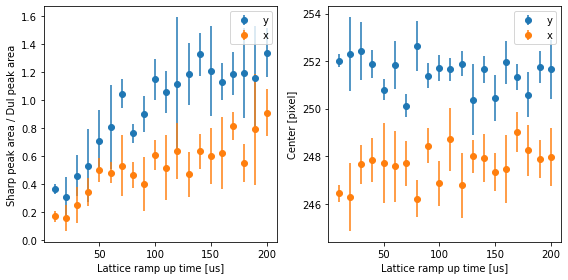

In [88]:
fig =plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(1,2,1)
ax1.errorbar(unique_param,bec_fraction_y_list, bec_fraction_y_err_list,fmt='o',label ='y')
ax1.errorbar(unique_param,bec_fraction_x_list, bec_fraction_x_err_list,fmt='o',label='x')
ax1.set_xlabel('Lattice ramp up time [us]')
ax1.set_ylabel('Sharp peak area / Dul peak area')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.errorbar(unique_param,centery_list, centery_err_list, fmt='o',label ='y')
ax2.errorbar(unique_param,centerx_list, centerx_err_list,fmt='o',label='x')
ax2.set_xlabel('Lattice ramp up time [us]')
ax2.set_ylabel('Center [pixel]')
ax2.legend()

plt.tight_layout()
plt.show()